### Implementing Multiclass Classification

Each week the Consumer Financial Protection Bureau sends thousands of consumers’ complaints about financial products and services to companies for a response. 

Need to Classify those consumer complaints into the product category it belongs to using the description of the complaint.

Once the algorithm is in place, whenever there is a new complaint, we can easily categorize it and can then be redirected to the concerned person. This will save a lot of time because we are minimizing the human intervention to decide whom this complaint should go to.


In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import string 
from nltk.stem import SnowballStemmer 
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split 
import os 
from textblob import TextBlob 
from nltk.stem import PorterStemmer 
from textblob import Word 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
import sklearn.feature_extraction.text as text 
from sklearn import model_selection, preprocessing,  linear_model, naive_bayes, metrics, svm 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import LinearSVC 
from sklearn.model_selection import cross_val_score 
from io import StringIO 
import seaborn as sns
%matplotlib inline

In [4]:
Data = pd.read_csv("consumer_complaints.csv",encoding='latin-1')

C:\Users\ErandaniD\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
Data.dtypes

date_received                   object
product                         object
sub_product                     object
issue                           object
sub_issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zipcode                         object
tags                            object
consumer_consent_provided       object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response                 object
consumer_disputed?              object
complaint_id                     int64
dtype: object

In [6]:
Data = Data[['product', 'consumer_complaint_narrative']] 
Data = Data[pd.notnull(Data['consumer_complaint_narrative'])]

In [7]:
Data.head()

,product,consumer_complaint_narrative
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,Consumer Loan,Due to inconsistencies in the amount owed that...
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...
190207,Mortgage,I have an open and current mortgage with Chase...
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...


In [8]:
# Factorizing the category column 
Data['category_id'] = Data['product'].factorize()[0] 
Data.head()

,product,consumer_complaint_narrative,category_id
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...,0
190135,Consumer Loan,Due to inconsistencies in the amount owed that...,1
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...,2
190207,Mortgage,I have an open and current mortgage with Chase...,2
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...,2


In [9]:
# Check the distriution of complaints by category
Data['product'].value_counts()

Debt collection            17552
Mortgage                   14919
Credit reporting           12526
Credit card                 7929
Bank account or service     5711
Consumer Loan               3678
Student loan                2128
Prepaid card                 861
Payday loan                  726
Money transfers              666
Other financial service      110
Name: product, dtype: int64

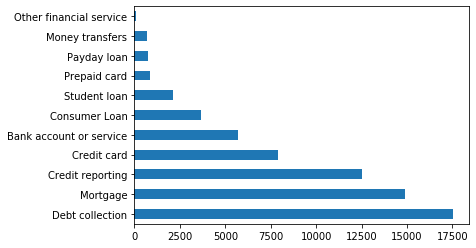

In [34]:
Data['product'].value_counts().plot(kind='barh')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(Data['consumer_complaint_narrative'], Data['category_id'])

In [13]:
#Feature engineering using TF-IDF
encoder = preprocessing.LabelEncoder() 
y_train = encoder.fit_transform(y_train) 
y_test = encoder.fit_transform(y_test)

In [14]:
from sklearn.pipeline import Pipeline

In [15]:
#Model fitting in a pipeline
clf = Pipeline([('tidf',TfidfVectorizer()), ('LR', LogisticRegression())])

In [16]:
clf.fit(X_train, y_train)

C:\Users\ErandaniD\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ErandaniD\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('tidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('LR',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1

In [19]:
# Checking accuracy
accuracy = metrics.accuracy_score(clf.predict(X_test), y_test)
print('accuracy :', accuracy)

accuracy : 0.8456472278769009


In [20]:
# Classification report 
print(metrics.classification_report(y_test, clf.predict(X_test), target_names=Data['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.81      0.90      0.85      4331
          Consumer Loan       0.83      0.56      0.67       941
               Mortgage       0.92      0.95      0.93      3730
            Credit card       0.80      0.81      0.80      1995
       Credit reporting       0.86      0.87      0.86      3164
           Student loan       0.91      0.76      0.83       510
Bank account or service       0.81      0.80      0.80      1414
            Payday loan       0.71      0.28      0.40       187
        Money transfers       0.85      0.48      0.61       184
Other financial service       0.00      0.00      0.00        19
           Prepaid card       0.84      0.61      0.71       227

               accuracy                           0.85     16702
              macro avg       0.76      0.64      0.68     16702
           weighted avg       0.84      0.85      0.84     16702



C:\Users\ErandaniD\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
#confusion matrix 
conf_mat = confusion_matrix(y_test,clf.predict(X_test)) 

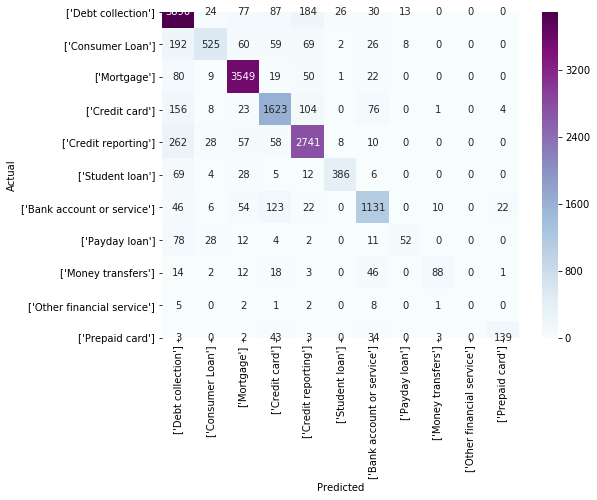

In [26]:
# Vizualizing confusion matrix
category_id_df = Data[['product', 'category_id']].drop_duplicates() .sort_values('category_id') 
category_to_id = dict(category_id_df.values) 
id_to_category = dict(category_id_df[['category_id', 'product']].values)

fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="BuPu", xticklabels=category_id_df[['product']].values,
            yticklabels=category_id_df[['product']].values) 
plt.ylabel('Actual') 
plt.xlabel('Predicted') 
plt.show()

In [28]:
#The accuracy of 85% is good for a baseline model. 
#Precision and recall look pretty good across the categories except for “Payday loan.” If you look for Payload loan, 
#most of the wrong predictions are Debt collection and Consumer Loan, 

In [29]:
# Prediction example 
texts =  ["This company refuses to provide me verification and validation of debt"+ "per my right under the FDCPA.  I do not believe this debt is mine."] 

In [30]:
predictions = clf.predict(texts) 

In [33]:
id_to_category[predictions[0]]

'Debt collection'